In [48]:
import pandas as pd
import numpy as np

## LOAD DATASET

In [49]:
df= pd.read_csv('diabetes.csv')
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
505,10,75,82,0,0,33.3,0.263,38,0


In [50]:
df = df.drop(['Pregnancies' , 'SkinThickness' , 'DiabetesPedigreeFunction'] , axis=1)

In [51]:
df.sample()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
283,161,86,0,30.4,47,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose        768 non-null    int64  
 1   BloodPressure  768 non-null    int64  
 2   Insulin        768 non-null    int64  
 3   BMI            768 non-null    float64
 4   Age            768 non-null    int64  
 5   Outcome        768 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 36.1 KB


In [53]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [54]:
df.head()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,148,72,0,33.6,50,1
1,85,66,0,26.6,31,0
2,183,64,0,23.3,32,1
3,89,66,94,28.1,21,0
4,137,40,168,43.1,33,1


In [55]:
ind_col = [col for col in df.columns if col != 'Outcome']
dep_col = 'Outcome'

x = df[ind_col]
y = df[dep_col]

df[dep_col].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [56]:
df.head()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,148,72,0,33.6,50,1
1,85,66,0,26.6,31,0
2,183,64,0,23.3,32,1
3,89,66,94,28.1,21,0
4,137,40,168,43.1,33,1


In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

## MEMBUAT MODEL DECISION TREE


In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc = DecisionTreeClassifier(
     ccp_alpha = 0.0 , class_weight = None , criterion = 'entropy' ,
     max_depth = 4 , max_features = None , max_leaf_nodes = None ,
     min_impurity_decrease = 0.0 , min_samples_leaf = 1 ,
     min_samples_split = 2 , min_weight_fraction_leaf = 0.0 ,
     random_state=42 , splitter = 'best'
)

model = dtc.fit(x_train, y_train)
dtc_acc = accuracy_score(y_test, model.predict(x_test))
dtc_train = accuracy_score(y_train, model.predict(x_train))

print(f"Akurasi Data Testing: {round(dtc_acc, 2)}%")
print(f"Akurasi Data Training: {round(dtc_train, 2)}%")

print(f"confusion_matrix: \n{confusion_matrix(y_test, model.predict(x_test))}")
confusion = confusion_matrix(y_test, model.predict(x_test))
tn , fp , fn , tp = confusion.ravel()
print(f"Classification Report: \n{classification_report(y_test, model.predict(x_test))}")
df.head()




Akurasi Data Testing: 0.74%
Akurasi Data Training: 0.78%
confusion_matrix: 
[[84 23]
 [17 30]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       107
           1       0.57      0.64      0.60        47

    accuracy                           0.74       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.75      0.74      0.74       154



,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,148,72,0,33.6,50,1
1,85,66,0,26.6,31,0
2,183,64,0,23.3,32,1
3,89,66,94,28.1,21,0
4,137,40,168,43.1,33,1


## INPUT DATA

In [59]:
input_data = (148,72,0,33.6,50)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if(prediction[0]==0):
     print("The person is not diabetic")
else:
     print("The person is diabetic")


[1]
The person is diabetic


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Visualisasi Pohon Keputusan

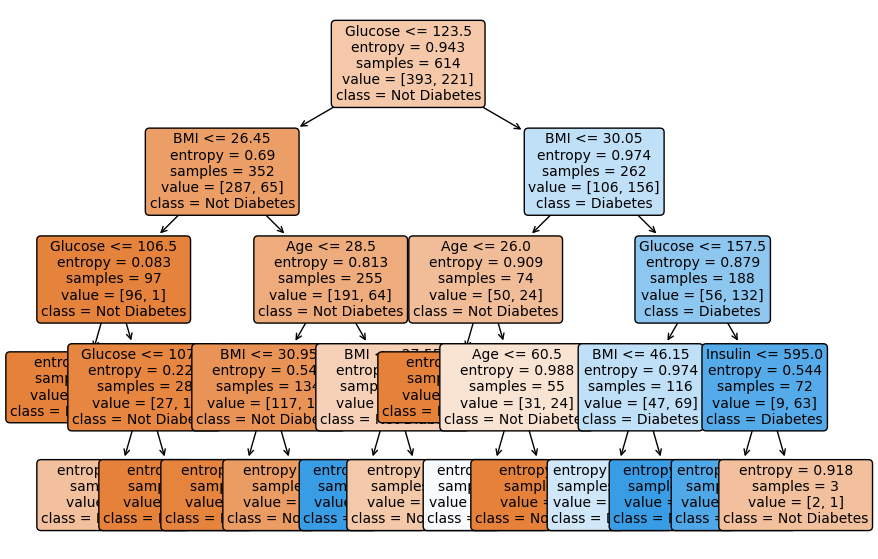

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
_ = tree.plot_tree(model, feature_names=ind_col, class_names=['Not Diabetes' , 'Diabetes'], filled=True, rounded=True, fontsize=10)